# BORDES

In [463]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('FRSEA.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

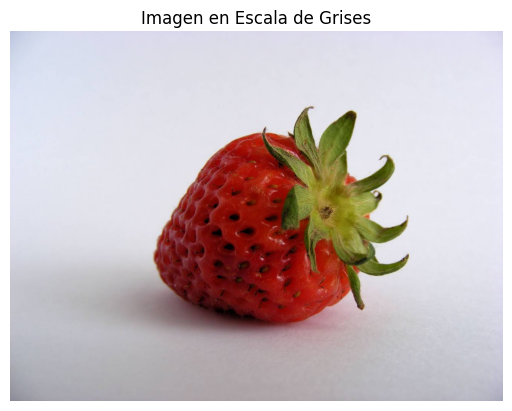

In [464]:
# Mostrar la imagen en escala de grises
plt.imshow(image_rgb)  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

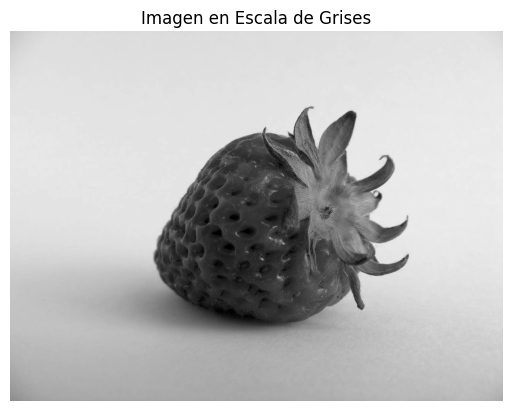

In [465]:
# Mostrar la imagen en escala de grises
plt.imshow(gray, cmap='gray')  # cmap='gray' para mostrar en escala de grises
plt.title('Imagen en Escala de Grises')
plt.axis('off')  # Ocultar ejes
plt.show()

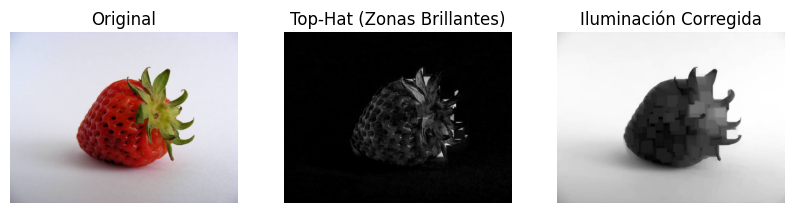

In [466]:
# Crear un kernel grande para detectar áreas brillantes
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45,45))

# Aplicar filtro "Top-Hat" (realza áreas más brillantes)
top_hat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# Restar el top-hat de la imagen original para compensar la iluminación
imagen_corrigida = cv2.subtract(gray, top_hat)

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Top-Hat (Zonas Brillantes)")
plt.imshow(top_hat, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Iluminación Corregida")
plt.imshow(imagen_corrigida, cmap='gray')
plt.axis('off')

plt.show()

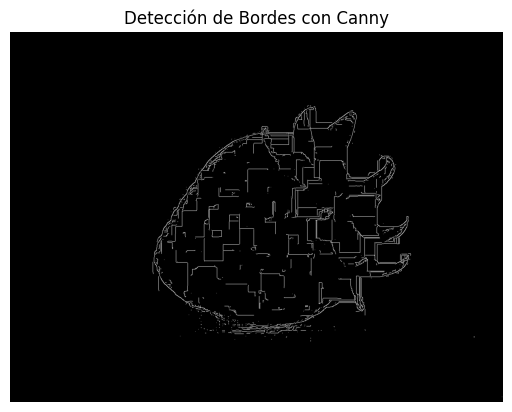

In [467]:
# Aplicar detección de bordes con Canny
bordes_canny = cv2.Canny(imagen_corrigida, 31,31) 
#bordes_canny = cv2.Canny(prewitt_result, 110, 20) 
# Mostrar resultado
plt.imshow(bordes_canny, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [468]:
kernel = np.ones((1,1), np.uint8)
bordes_dilatados = cv2.dilate(bordes_canny, kernel, iterations=1000)

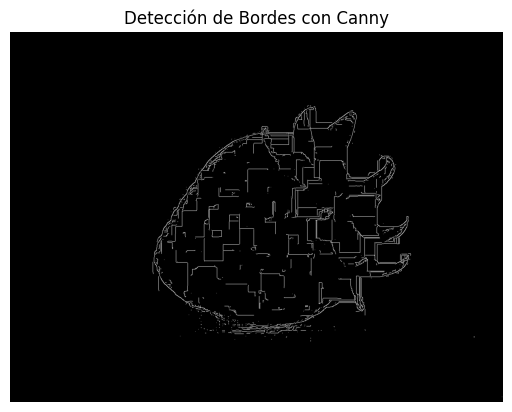

In [469]:
# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(1298.5), np.float64(973.5), np.float64(-0.5))

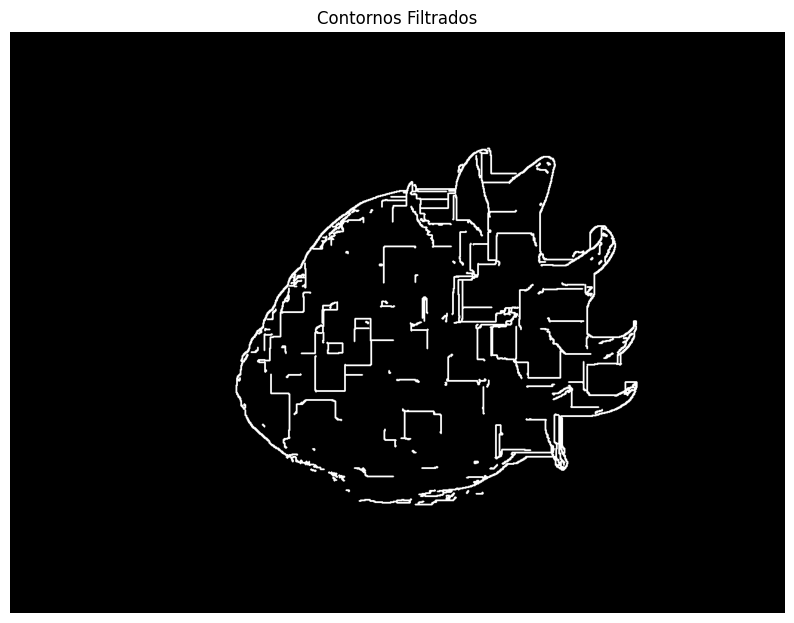

In [470]:
kernel = np.ones((5,5), np.uint8)
# 4. Encontrar contornos
contornos, jerarquia = cv2.findContours(bordes_dilatados, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Filtrar contornos (ajusta el valor 10000 según el tamaño de tu imagen)
contornos_filtrados = [cnt for cnt in contornos if cv2.contourArea(cnt) > 1]  # Reducí el umbral

# 6. Crear imagen en blanco para dibujar
imagen_contornos = np.zeros_like(gray)

# 7. Dibujar contornos
cv2.drawContours(imagen_contornos, contornos_filtrados, -1, (255), 2)  # Reduje el thickness

# 8. Mostrar resultado
plt.figure(figsize=(10,10))
plt.imshow(imagen_contornos, cmap='gray')
plt.title("Contornos Filtrados")
plt.axis('off')

In [471]:
kernel = np.ones((1,1), np.uint8)
bordes_erosionados = cv2.erode(bordes_dilatados, kernel, iterations=100000)

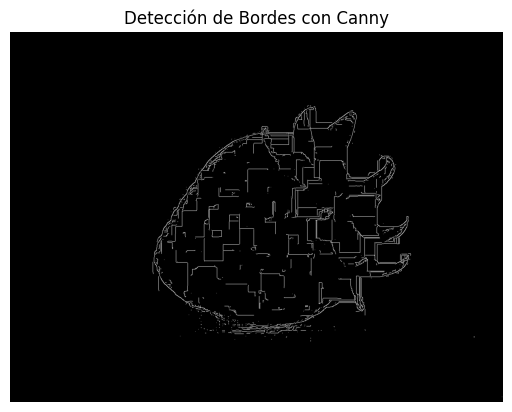

In [472]:
# Mostrar resultado
plt.imshow(bordes_erosionados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [473]:
kernel = np.ones((3,3), np.uint8)
bordes_dilatados = cv2.dilate(bordes_erosionados, kernel, iterations=1)

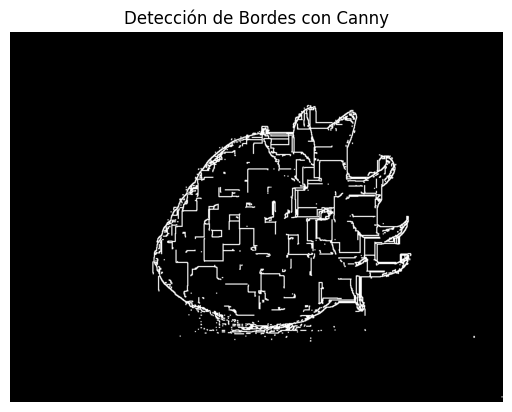

In [474]:

# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [475]:
# 3. Realizar operación de cierre para conectar bordes
kernel = np.ones((5,5), np.uint8)
bordes_cerrados = cv2.morphologyEx(bordes_dilatados , cv2.MORPH_CLOSE, kernel)

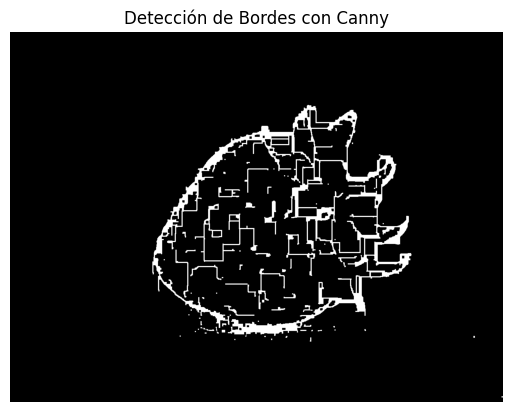

In [476]:
# Mostrar resultado
plt.imshow(bordes_cerrados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [477]:
kernel = np.ones((1,1), np.uint8)
bordes_erosionados = cv2.erode(bordes_cerrados, kernel, iterations=10)

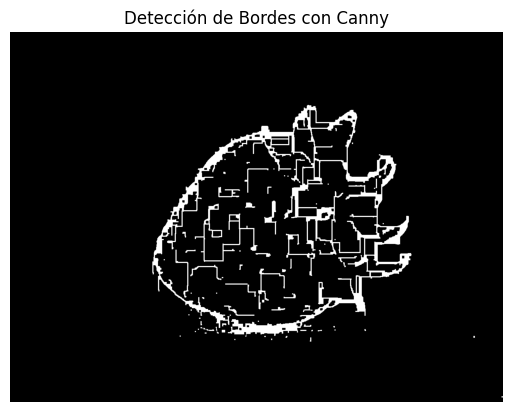

In [478]:
# Mostrar resultado
plt.imshow(bordes_erosionados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

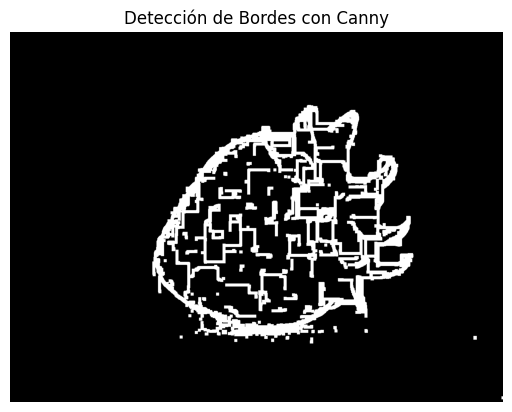

In [479]:
kernel = np.ones((2,2), np.uint8)
bordes_dilatados = cv2.dilate(bordes_erosionados, kernel, iterations=5)
# Mostrar resultado
plt.imshow(bordes_dilatados, cmap='gray')
plt.title("Detección de Bordes con Canny")
plt.axis('off')
plt.show()

In [480]:
imagen_bordes_superpuesta = cv2.addWeighted(image_rgb, 0.5, cv2.cvtColor(bordes_cerrados, cv2.COLOR_GRAY2BGR), 0.7, 5)


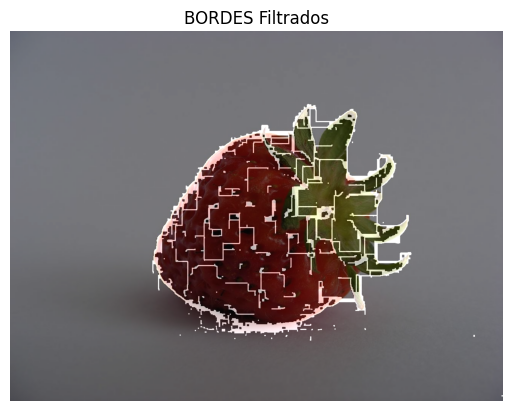

In [481]:
# Mostrar resultado
plt.imshow(imagen_bordes_superpuesta, cmap='gray')
plt.title("BORDES Filtrados")
plt.axis('off')
plt.show()

# SEGUIMIENTO DE PERIMETRO

# OBTENCIÓN DEL CONTORNO

## Moore-Neighbor Tracing

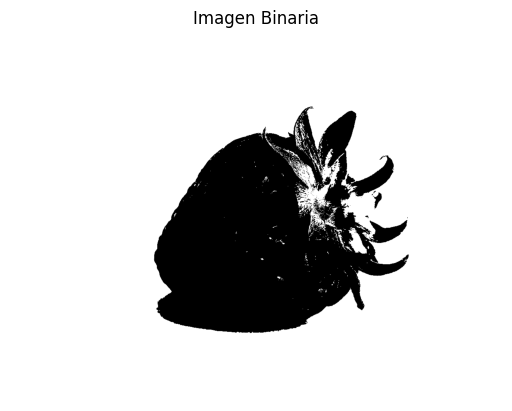

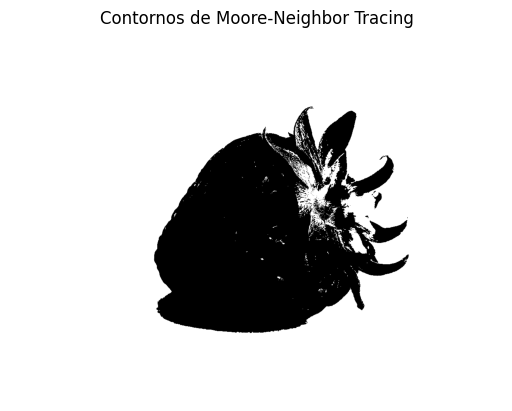

In [389]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar el Moore-Neighbor Tracing
def moore_neighbor_tracing(imagen_binaria):
    # Definir los 8 vecinos de Moore
    vecinos = [(-1, -1), (-1, 0), (-1, 1),
               ( 0, -1),         ( 0, 1),
               ( 1, -1), ( 1, 0), ( 1, 1)]
    
    # Obtener las dimensiones de la imagen
    h, w = imagen_binaria.shape
    
    # Crear una lista para almacenar los contornos encontrados
    contornos = []
    
    # Crear una imagen para marcar los píxeles visitados
    imagen_visitada = np.zeros_like(imagen_binaria, dtype=bool)
    
    # Función para obtener el vecino más cercano a seguir (en sentido horario)
    def obtener_vecino_inicial(x, y):
        for dx, dy in vecinos:
            nx, ny = x + dx, y + dy
            if 0 <= nx < h and 0 <= ny < w and imagen_binaria[nx, ny] == 255 and not imagen_visitada[nx, ny]:
                return nx, ny
        return None, None
    
    # Bucle para encontrar contornos
    for i in range(h):
        for j in range(w):
            if imagen_binaria[i, j] == 255 and not imagen_visitada[i, j]:
                # Iniciar un nuevo contorno
                contorno = []
                x, y = i, j
                while True:
                    contorno.append((x, y))
                    imagen_visitada[x, y] = True
                    
                    # Buscar el siguiente vecino
                    nx, ny = obtener_vecino_inicial(x, y)
                    
                    if nx is None:  # Si no hay más vecinos, termina el contorno
                        break
                    x, y = nx, ny
                
                if contorno:
                    contornos.append(contorno)
    
    return contornos

# Cargar una imagen en color
imagen_original = cv2.imread('FRSEA.jpg')

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen usando un umbral
_, imagen_binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)

# Mostrar imagen binaria
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')
plt.show()

# Llamar a la función de Moore-Neighbor Tracing
contornos = moore_neighbor_tracing(imagen_binaria)

# Crear una imagen para mostrar los contornos
imagen_contornos = np.zeros_like(imagen_binaria)

# Dibujar los contornos encontrados
for contorno in contornos:
    for punto in contorno:
        imagen_contornos[punto] = 255

# Mostrar el resultado de los contornos
plt.imshow(imagen_contornos, cmap='gray')
plt.title('Contornos de Moore-Neighbor Tracing')
plt.axis('off')
plt.show()


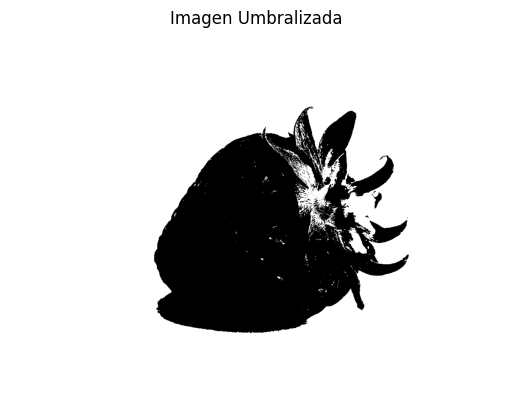

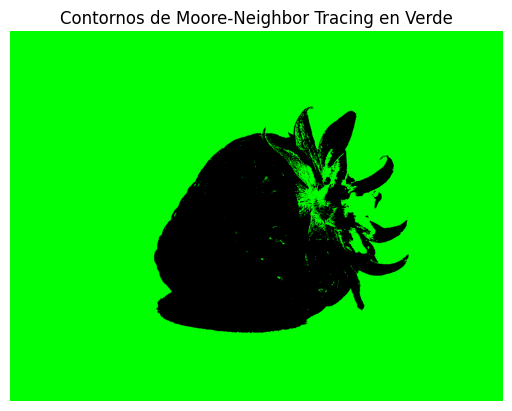

In [391]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar el Moore-Neighbor Tracing
def moore_neighbor_tracing(imagen_binaria):
    # Definir los 8 vecinos de Moore
    vecinos = [(-1, -1), (-1, 0), (-1, 1),
               ( 0, -1),         ( 0, 1),
               ( 1, -1), ( 1, 0), ( 1, 1)]
    
    # Obtener las dimensiones de la imagen
    h, w = imagen_binaria.shape
    
    # Crear una lista para almacenar los contornos encontrados
    contornos = []
    
    # Crear una imagen para marcar los píxeles visitados
    imagen_visitada = np.zeros_like(imagen_binaria, dtype=bool)
    
    # Función para obtener el vecino más cercano a seguir (en sentido horario)
    def obtener_vecino_inicial(x, y):
        for dx, dy in vecinos:
            nx, ny = x + dx, y + dy
            if 0 <= nx < h and 0 <= ny < w and imagen_binaria[nx, ny] == 255 and not imagen_visitada[nx, ny]:
                return nx, ny
        return None, None
    
    # Bucle para encontrar contornos
    for i in range(h):
        for j in range(w):
            if imagen_binaria[i, j] == 255 and not imagen_visitada[i, j]:
                # Iniciar un nuevo contorno
                contorno = []
                x, y = i, j
                while True:
                    contorno.append((x, y))
                    imagen_visitada[x, y] = True
                    
                    # Buscar el siguiente vecino
                    nx, ny = obtener_vecino_inicial(x, y)
                    
                    if nx is None:  # Si no hay más vecinos, termina el contorno
                        break
                    x, y = nx, ny
                
                if contorno:
                    contornos.append(contorno)
    
    return contornos

# Cargar una imagen en color
imagen_original = cv2.imread('FRSEA.jpg')

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización (puedes ajustar el valor de umbral)
umbral = 127  # Ajusta el valor del umbral según sea necesario
_, imagen_binaria = cv2.threshold(gris, umbral, 255, cv2.THRESH_BINARY)

# Mostrar imagen binaria
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')
plt.show()

# Llamar a la función de Moore-Neighbor Tracing
contornos = moore_neighbor_tracing(imagen_binaria)

# Crear una imagen en color para mostrar los contornos
imagen_contornos = np.zeros((imagen_original.shape[0], imagen_original.shape[1], 3), dtype=np.uint8)

# Dibujar los contornos en verde
for contorno in contornos:
    for punto in contorno:
        imagen_contornos[punto[0], punto[1]] = (0, 255, 0)  # Color verde (BGR)

# Mostrar el resultado de los contornos en verde
plt.imshow(imagen_contornos)
plt.title('Contornos de Moore-Neighbor Tracing en Verde')
plt.axis('off')
plt.show()


##  BARRIDO RADIAL

### CANNY SIN PREPROCESAMIENTO

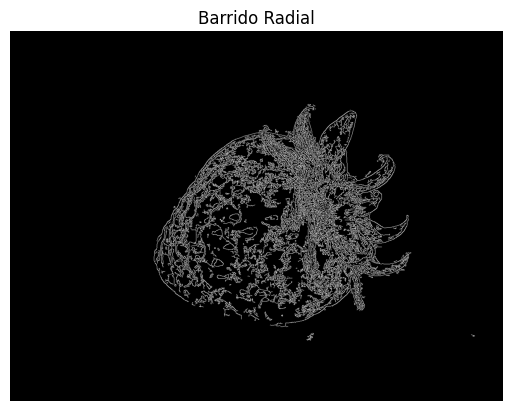

In [366]:
# Aplicar Canny para detectar bordes (se usa en barrido radial)
bordes = cv2.Canny(gris, 20, 70)

# Mostrar el resultado
plt.imshow(bordes, cmap='gray')
plt.title('Barrido Radial')
plt.axis('off')
plt.show()


### PREPROCESAMIENTO

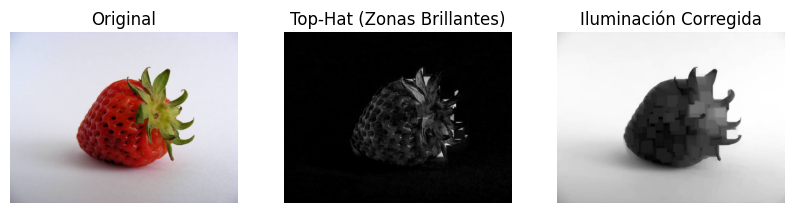

In [399]:

# Cargar una imagen en color
imagen_original = cv2.imread('FRSEA.jpg')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

# Crear un kernel grande para detectar áreas brillantes
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45,45))

# Aplicar filtro "Top-Hat" (realza áreas más brillantes)
top_hat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# Restar el top-hat de la imagen original para compensar la iluminación
imagen_corrigida = cv2.subtract(gray, top_hat)

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_rgb, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Top-Hat (Zonas Brillantes)")
plt.imshow(top_hat, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Iluminación Corregida")
plt.imshow(imagen_corrigida, cmap='gray')
plt.axis('off')

plt.show()

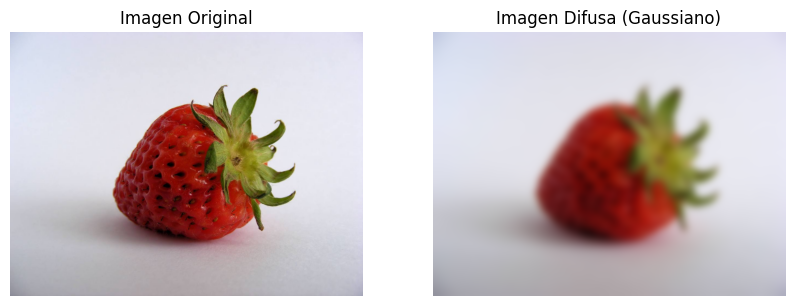

In [431]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
imagen = cv2.imread('FRSEA.jpg')

# Convertir la imagen a RGB (OpenCV usa BGR por defecto)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Aplicar desenfoque gaussiano
imagen_difusa = cv2.GaussianBlur(imagen_rgb, (95, 95), 0)  # Tamaño del kernel: (15, 15)

# Mostrar la imagen original y la difusa
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_difusa)
plt.title('Imagen Difusa (Gaussiano)')
plt.axis('off')

plt.show()


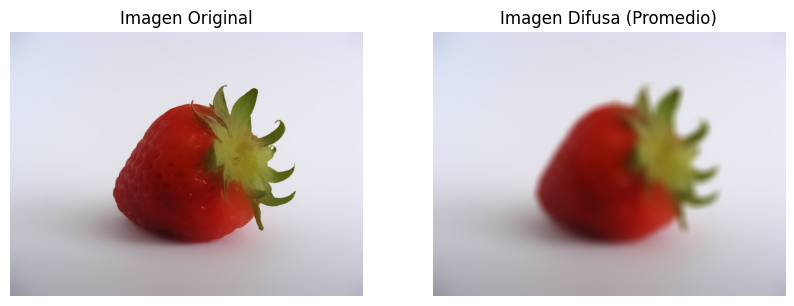

In [448]:
# Aplicar desenfoque promedio
imagen_difusa_promedio = cv2.blur(imagen_difusa_bilateral, (35, 35))  # Tamaño del kernel: (15, 15)

# Mostrar la imagen original y la difusa
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_difusa_bilateral)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_difusa_promedio)
plt.title('Imagen Difusa (Promedio)')
plt.axis('off')

plt.show()


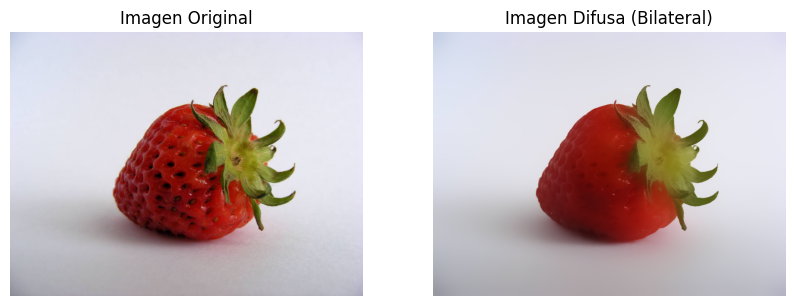

In [444]:
# Aplicar desenfoque bilateral
imagen_difusa_bilateral = cv2.bilateralFilter(imagen_rgb, 95, 95, 95)

# Mostrar la imagen original y la difusa
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_difusa_bilateral)
plt.title('Imagen Difusa (Bilateral)')
plt.axis('off')

plt.show()


### CONTORNOS CON CANNY

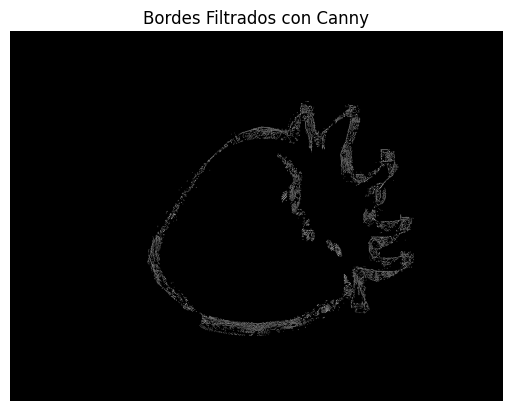

In [449]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar Canny para detectar bordes (se usa en barrido radial)
bordes = cv2.Canny(imagen_difusa_promedio, 20, 20)

# Crear una máscara para filtrar bordes débiles
# Umbral de intensidad de los bordes
umbral_intensidad = 100

# Filtrar bordes débiles (por ejemplo, valores menores que umbral_intensidad)
bordes_filtrados = np.where(bordes > umbral_intensidad, bordes, 0).astype(np.uint8)

# Mostrar el resultado
plt.imshow(bordes_filtrados, cmap='gray')
plt.title('Bordes Filtrados con Canny')
plt.axis('off')
plt.show()


## Suzuki-Abe

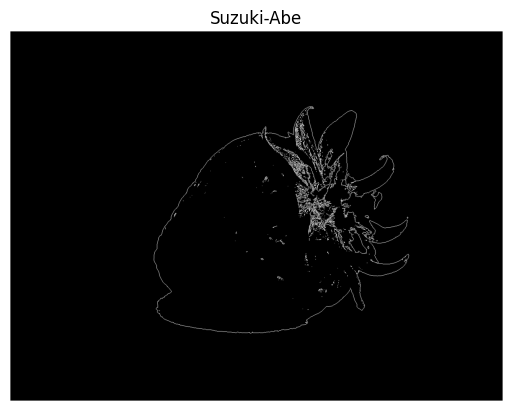

In [320]:
# Encontrar contornos con Suzuki-Abe
contornos, _ = cv2.findContours(binaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Crear imagen negra para mostrar contornos
imagen_suzuki = np.zeros_like(binaria)
cv2.drawContours(imagen_suzuki, contornos, -1, (255), 1)

# Mostrar resultado
plt.imshow(imagen_suzuki, cmap='gray')
plt.title('Suzuki-Abe')
plt.axis('off')
plt.show()

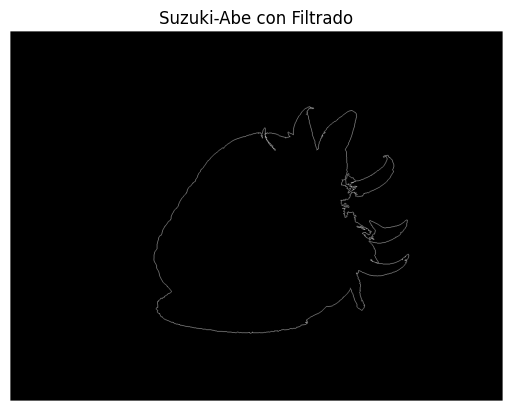

In [394]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen binaria (asegurándose de que ya esté en formato binario)
# binaria = cv2.imread('ruta/a/tu/imagen', 0)  # Si necesitas cargar la imagen binaria

# Encontrar contornos con Suzuki-Abe
contornos, _ = cv2.findContours(binaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Establecer un umbral para el área mínima del contorno (por ejemplo, 500 píxeles)
umbral_area = 10000

# Crear una imagen negra para mostrar los contornos filtrados
imagen_suzuki_filtrada = np.zeros_like(binaria)

# Filtrar los contornos por área
for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > umbral_area:
        # Dibujar el contorno filtrado en la imagen
        cv2.drawContours(imagen_suzuki_filtrada, [contorno], -1, (255), 1)

# Mostrar el resultado
plt.imshow(imagen_suzuki_filtrada, cmap='gray')
plt.title('Suzuki-Abe con Filtrado')
plt.axis('off')
plt.show()


# SEGUIMIENTO DEL CONTORNO

## BORDER FOLLOWING

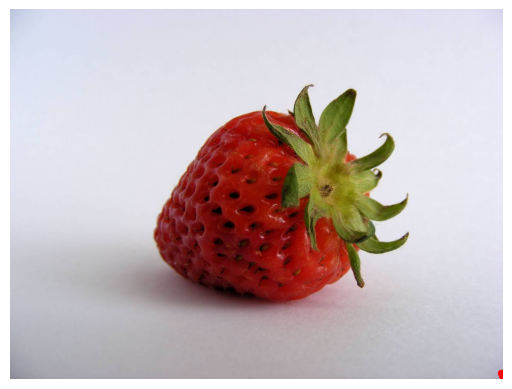

In [493]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def border_following(binary_image):
    # Encuentra los contornos
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Usamos el primer contorno encontrado

    # Crear una lista para almacenar el perímetro seguido
    perimeter_points = []

    # Simplificación del contorno (aproximación poligonal)
    epsilon = 3  # Umbral para la aproximación (ajústalo si es necesario)
    approx_contour = cv2.approxPolyDP(contour, epsilon, True)

    # Seguimos el contorno aproximado
    for point in approx_contour:
        perimeter_points.append(tuple(point[0]))  # Añadir los puntos del contorno

    return perimeter_points

# Cargar la imagen en color
image = cv2.imread('FRSEA.jpg')

# Convertir a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral adaptativo para binarización
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 11, 2)

# Mejorar la imagen con una operación de cierre para cerrar huecos en el contorno
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Aplicar el algoritmo de border following
perimeter = border_following(bordes_dilatados)

# Mostrar los resultados
for point in perimeter:
    # Usar color rojo para visualizar los puntos
    cv2.circle(image, point, 10, (0, 0, 255), -1)

# Convertir la imagen a RGB para su visualización en matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los puntos del contorno
plt.imshow(image_rgb)
plt.axis('off')  # Para no mostrar los ejes
plt.show()



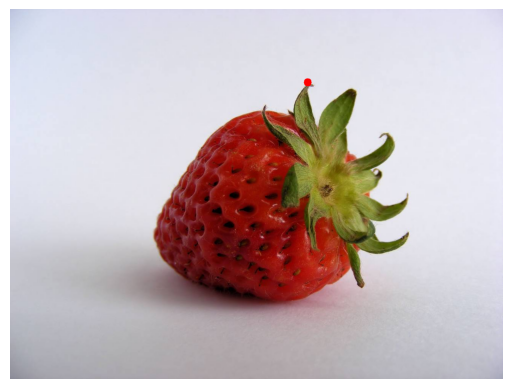

In [494]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def border_following(binary_image, start_point=None):
    # Iniciar el seguimiento del borde desde el primer punto no blanco
    if start_point is None:
        # Buscar un punto de borde (no blanco) para comenzar
        start_point = None
        for y in range(binary_image.shape[0]):
            for x in range(binary_image.shape[1]):
                if binary_image[y, x] == 255:  # Punto de borde encontrado
                    start_point = (x, y)
                    break
            if start_point is not None:
                break

    if start_point is None:
        return []  # No hay bordes para seguir

    # Dirección de exploración: arriba, derecha, abajo, izquierda (dirección en el sentido horario)
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # Direcciones: [arriba, derecha, abajo, izquierda]

    # Lista para almacenar los puntos del perímetro
    perimeter_points = []
    current_point = start_point
    prev_direction = 1  # Comenzamos con dirección "derecha"
    perimeter_points.append(current_point)

    while True:
        # Recorremos las 4 direcciones posibles
        for i in range(4):
            # Calcular la dirección a la que nos moveremos
            direction = (prev_direction + i) % 4
            dx, dy = directions[direction]
            next_point = (current_point[0] + dx, current_point[1] + dy)

            # Verificar si el siguiente punto está dentro de la imagen y es un borde (blanco)
            if 0 <= next_point[0] < binary_image.shape[1] and 0 <= next_point[1] < binary_image.shape[0]:
                if binary_image[next_point[1], next_point[0]] == 255:
                    perimeter_points.append(next_point)
                    current_point = next_point
                    prev_direction = (direction + 2) % 4  # Volver en la dirección opuesta
                    break
        # Si regresamos al punto de inicio, terminamos
        if current_point == start_point:
            break

    return perimeter_points

# Cargar la imagen en color
image = cv2.imread('FRSEA.jpg')

# Convertir a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar filtro Gaussiano para reducir ruido
image_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Usar el detector de bordes de Canny
edges = cv2.Canny(image_blurred, 50, 150)

# Realizar una operación de dilatado para conectar los bordes
kernel = np.ones((5, 5), np.uint8)
edges_dilated = cv2.dilate(edges, kernel, iterations=1)

# Seguir el borde
perimeter = border_following(bordes_dilatados)

# Mostrar los resultados
for point in perimeter:
    # Usar color rojo para visualizar los puntos
    cv2.circle(image, point, 10, (0, 0, 255), -1)

# Convertir la imagen a RGB para su visualización en matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los puntos del contorno
plt.imshow(image_rgb)
plt.axis('off')  # Para no mostrar los ejes
plt.show()



## Perimeter tracing

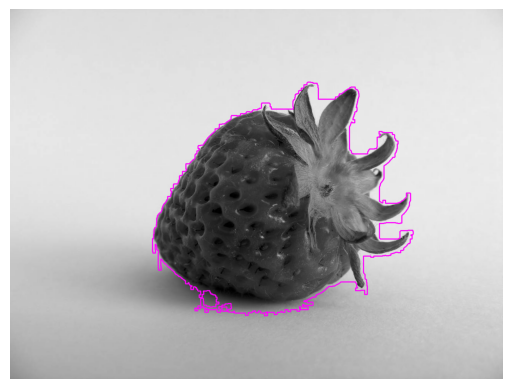

In [492]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perimeter_tracing(binary_image):
    # Encuentra el primer píxel de borde
    start_point = None
    for y in range(binary_image.shape[0]):
        for x in range(binary_image.shape[1]):
            if binary_image[y, x] == 255:  # Encontramos un borde
                start_point = (x, y)
                break
        if start_point:
            break

    if not start_point:
        return []

    # Dirección del movimiento (arriba, derecha, abajo, izquierda)
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    direction_index = 0  # Comenzamos moviéndonos hacia arriba
    perimeter_points = [start_point]
    current_position = start_point
    prev_direction = None

    while True:
        # Buscar el siguiente punto de borde en una dirección específica
        for i in range(4):
            next_direction = (direction_index + i) % 4
            dx, dy = directions[next_direction]
            new_position = (current_position[0] + dx, current_position[1] + dy)

            # Verificamos si la nueva posición es un borde
            if binary_image[new_position[1], new_position[0]] == 255:
                perimeter_points.append(new_position)
                current_position = new_position
                direction_index = (next_direction + 3) % 4  # Giramos a la derecha
                break

        if current_position == start_point:  # Hemos vuelto al punto de inicio
            break

    return perimeter_points

# Cargar una imagen binarizada
image = cv2.imread('FRSEA.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Aplicar el algoritmo de perimeter tracing
perimeter = perimeter_tracing(bordes_dilatados)

# Convertir la imagen a color para poder dibujar en rosa
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Dibujar los puntos del perímetro de color rosa (255, 0, 255 en BGR)
for point in perimeter:
    cv2.circle(image_color, point, 1, (255, 0, 255), -1)  # Rosa en BGR

# Mostrar los resultados
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis('off')
plt.show()



## Marching squares

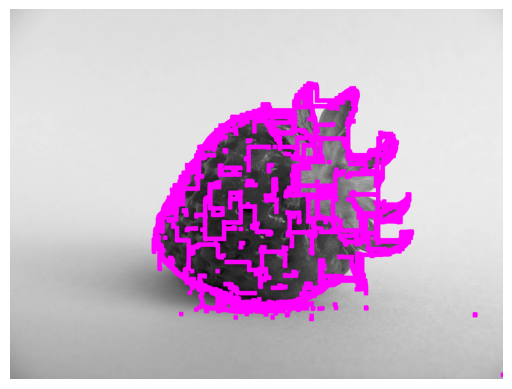

In [487]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def marching_squares(binary_image):
    # Extrae el contorno de la imagen binarizada utilizando el algoritmo de Marching Squares
    contours = []
    for y in range(1, binary_image.shape[0] - 1):
        for x in range(1, binary_image.shape[1] - 1):
            # Recolectar los valores de los 4 vecinos más cercanos
            square = binary_image[y-1:y+2, x-1:x+2]
            if np.any(square == 255):  # Si hay un borde en el cuadrado
                contours.append((x, y))
    
    return contours

# Cargar una imagen binarizada
image = cv2.imread('FRSEA.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Aplicar el algoritmo de marching squares
contours = marching_squares(bordes_dilatados)

# Convertir la imagen a color para poder dibujar en rosa
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Dibujar los contornos de color rosa (255, 0, 255 en BGR)
for point in contours:
    cv2.circle(image_color, point, 1, (255, 0, 255), -1)  # Rosa en BGR

# Mostrar los resultados
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para matplotlib
plt.axis('off')
plt.show()



## Find contorus

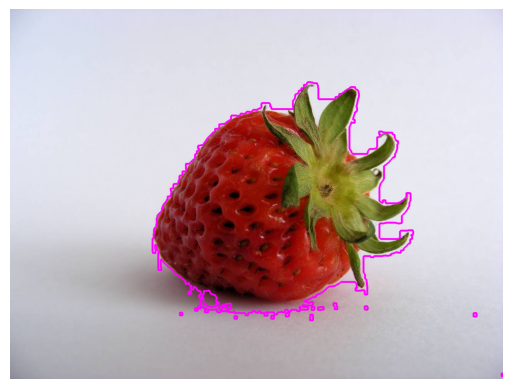

In [488]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('FRSEA.jpg')

# Convertir la imagen a HSV (espacio de color más adecuado para segmentar colores)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir los rangos para el color rosa en HSV
lower_pink = np.array([130, 50, 50])  # Umbral inferior para rosa
upper_pink = np.array([170, 255, 255])  # Umbral superior para rosa

# Crear una máscara que detecte solo el color rosa
mask = cv2.inRange(hsv_image, lower_pink, upper_pink)

# Encontrar los contornos de la máscara
contours, _ = cv2.findContours(bordes_dilatados, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen original
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (255, 0, 255), 3)  # Dibuja los contornos en color rosa

# Mostrar la imagen con los contornos
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# CODIGOS DE CADENA

Número de contornos encontrados: 791


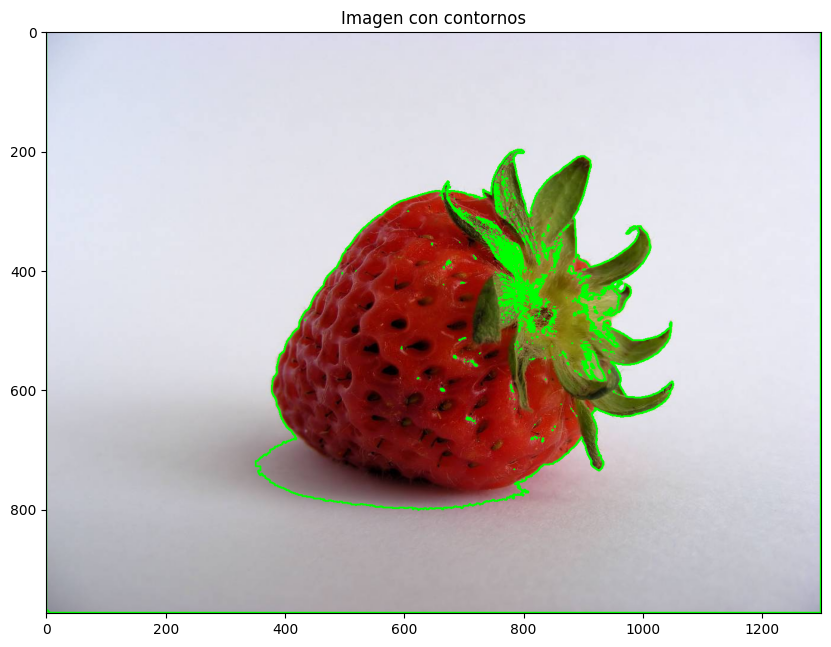

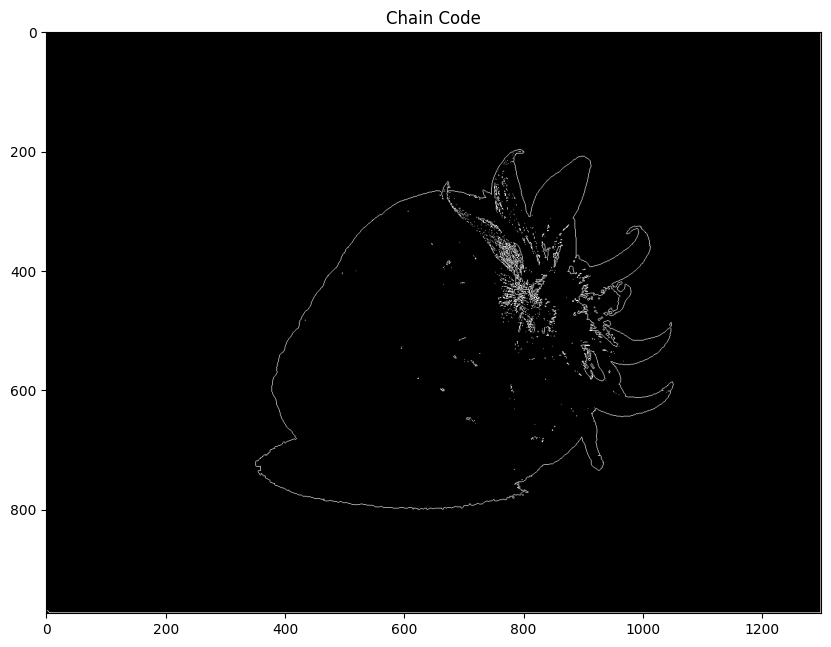

Contorno 0: 4539 puntos
Contorno 1: 8 puntos
Contorno 2: 4 puntos
Contorno 3: 13 puntos
Contorno 4: 4 puntos
Contorno 5: 8 puntos
Contorno 6: 4 puntos
Contorno 7: 4 puntos
Contorno 8: 11 puntos
Contorno 9: 7 puntos
Contorno 10: 4 puntos
Contorno 11: 6 puntos
Contorno 12: 14 puntos
Contorno 13: 29 puntos
Contorno 14: 11 puntos
Contorno 15: 6 puntos
Contorno 16: 4 puntos
Contorno 17: 13 puntos
Contorno 18: 4 puntos
Contorno 19: 7 puntos
Contorno 20: 4 puntos
Contorno 21: 6 puntos
Contorno 22: 8 puntos
Contorno 23: 6 puntos
Contorno 24: 4 puntos
Contorno 25: 6 puntos
Contorno 26: 7 puntos
Contorno 27: 4 puntos
Contorno 28: 4 puntos
Contorno 29: 3547 puntos
Contorno 30: 3 puntos
Contorno 31: 2 puntos
Contorno 32: 2 puntos
Contorno 33: 1 puntos
Contorno 34: 7 puntos
Contorno 35: 1 puntos
Contorno 36: 3 puntos
Contorno 37: 1 puntos
Contorno 38: 5 puntos
Contorno 39: 8 puntos
Contorno 40: 3 puntos
Contorno 41: 4 puntos
Contorno 42: 3 puntos
Contorno 43: 1 puntos
Contorno 44: 1 puntos
Contorno

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
imagen = cv2.imread('FRSEA.jpg')

# Convertir a escala de grises
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Binarizar con Otsu (suele dar mejores resultados)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Encontrar contornos (modificando los parámetros)
contornos, jerarquia = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Verificar los contornos encontrados
print("Número de contornos encontrados:", len(contornos))

# Crear una copia de la imagen original para dibujar los contornos
imagen_contornos = imagen.copy()

# Dibujar los contornos en la imagen original (para verificar)
cv2.drawContours(imagen_contornos, contornos, -1, (0,255,0), 2)

# Mostrar la imagen original con los contornos
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
plt.title('Imagen con contornos')
plt.show()

# Para el chain code, crear imagen negra
imagen_chaincode = np.zeros_like(gray)

# Dibujar los contornos en la imagen negra
cv2.drawContours(imagen_chaincode, contornos, -1, (255), 1)

# Mostrar el chain code
plt.figure(figsize=(10,10))
plt.imshow(imagen_chaincode, cmap='gray')
plt.title('Chain Code')
plt.show()

# Imprimir información sobre los contornos
for i, cnt in enumerate(contornos):
    print(f"Contorno {i}: {len(cnt)} puntos")

# PERFIL CENTORIDAL

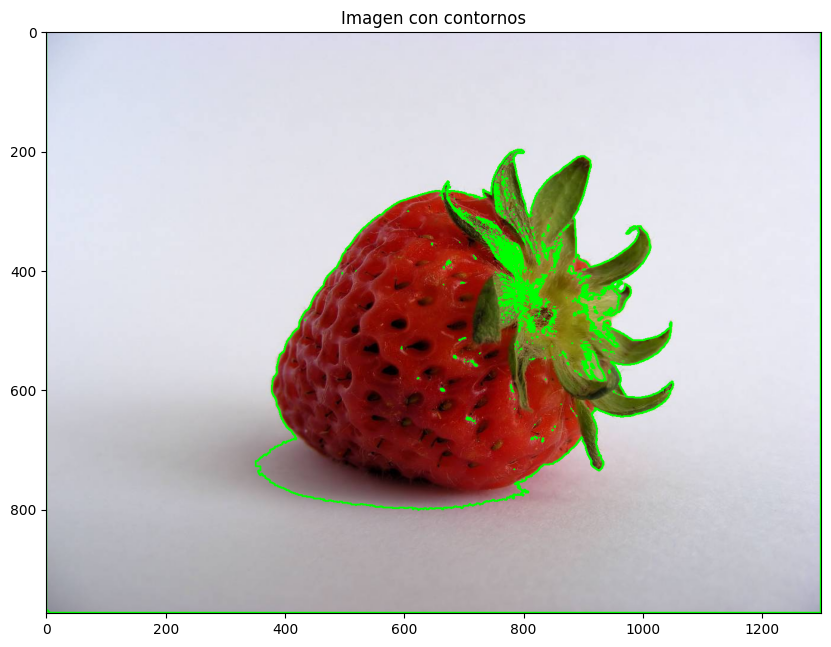

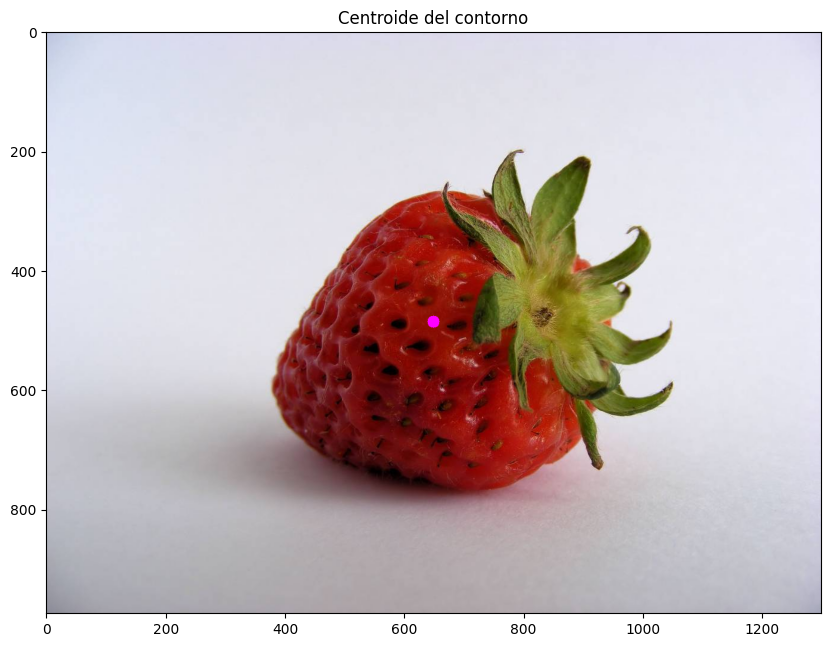

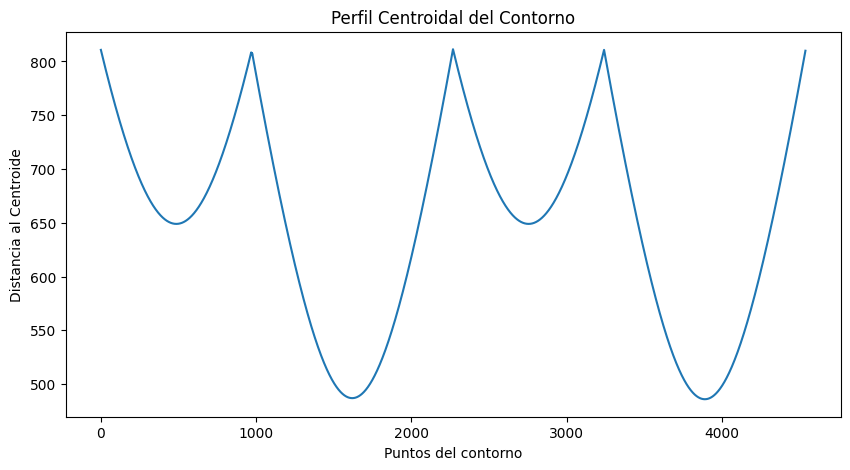

In [496]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
imagen = cv2.imread('FRSEA.jpg')

# Convertir a escala de grises
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Binarizar con Otsu (suele dar mejores resultados)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Encontrar contornos
contornos, jerarquia = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Crear una copia de la imagen original para dibujar los contornos
imagen_contornos = imagen.copy()

# Dibujar los contornos en la imagen original (para verificar)
cv2.drawContours(imagen_contornos, contornos, -1, (0,255,0), 2)

# Mostrar la imagen con los contornos
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
plt.title('Imagen con contornos')
plt.show()

# Elegir un contorno (en este caso el primer contorno)
contorno = contornos[0]

# Calcular el centroide del contorno
moments = cv2.moments(contorno)
if moments["m00"] != 0:
    cx = int(moments["m10"] / moments["m00"])
    cy = int(moments["m01"] / moments["m00"])
else:
    cx, cy = 0, 0  # Si el área del contorno es cero (contorno vacío)

# Dibujar el centroide en la imagen
imagen_centroides = imagen.copy()
cv2.circle(imagen_centroides, (cx, cy), 10, (255, 0, 255), -1) 

# Mostrar la imagen con el centroide
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(imagen_centroides, cv2.COLOR_BGR2RGB))
plt.title('Centroide del contorno')
plt.show()

# Calcular las distancias desde el centroide a cada punto del contorno (perfil centroidal)
distancias = []
for punto in contorno:
    x, y = punto[0]
    distancia = np.sqrt((x - cx)**2 + (y - cy)**2)
    distancias.append(distancia)

# Graficar el perfil centroidal (distancias)
plt.figure(figsize=(10,5))
plt.plot(distancias)
plt.title('Perfil Centroidal del Contorno')
plt.xlabel('Puntos del contorno')
plt.ylabel('Distancia al Centroide')
plt.show()
